<h1 style='color: #00A78C; font-size: 34px; font-weight: bold;'>Análise de Qualidade de Frutas

</h1>


# <font color="#FFA17A" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #FFA17A;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b>O objetivo deste projeto é realizar uma análise exploratória de dados em um conjunto de dados sobre frutas, identificando padrões e características que possam estar relacionadas à qualidade das frutas.</b></i>     
</p>

---

# <font color="#FFA17A" style="font-size: 30px;">Familiarização com o conjunto de dados</font>
<hr style="border: 2px solid #FFA17A;">

In [308]:
# IMPORTANMDO BIBLIOTECAS

import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import plotly.express as px
import locale
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [263]:
# Criação do Dataframe

df = pd.read_csv("apple_quality.csv")
df.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3991,3991.0,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431320563,good
3992,3992.0,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338260538,good
3993,3993.0,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080106,bad
3994,3994.0,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229254586,good
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [264]:
# Verificar a existencia de dados ausentes ou inconsistente

display(df[df.isnull().any(axis=1)])


# retirar valor nulo

df = df.drop(df[df.isnull().any(axis=1)].index)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [265]:
# Verificando tipos das colunas

for coluna in df.columns:
    print(f"{coluna} __________ {df[coluna].apply(type).unique()}")

A_id __________ [<class 'float'>]
Size __________ [<class 'float'>]
Weight __________ [<class 'float'>]
Sweetness __________ [<class 'float'>]
Crunchiness __________ [<class 'float'>]
Juiciness __________ [<class 'float'>]
Ripeness __________ [<class 'float'>]
Acidity __________ [<class 'str'>]
Quality __________ [<class 'str'>]


In [266]:
df[df['Quality'].apply(lambda x: type(x) == float)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [267]:
# transformando coluna "Acidity" em float

df['Acidity'] = df['Acidity'].astype(float)

# <font color="#FFA17A" style="font-size: 30px;">Compreensão estatística básica das variáveis</font>
<hr style="border: 2px solid #FFA17A;">

In [268]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [269]:
# Quantidade de dados
display(df.count()[0:2])

#média
display(df.iloc[:, 0:8].mean()[0:2])

#desvio padrão
display(df.iloc[:, 0:8].std()[0:2])

#mínimo
display(df.iloc[:, 0:8].min()[0:2])

#1º quartil
display(df.iloc[:, 0:8].quantile(0.25)[0:2])

#mediana
display(df.iloc[:, 0:8].median()[0:2])

#3º quartil
display(df.iloc[:, 0:8].quantile(0.75)[0:2])

# máximo
display(df.iloc[:, 0:8].max()[0:2])

A_id    4000
Size    4000
dtype: int64

A_id    1999.500000
Size      -0.503015
dtype: float64

A_id    1154.844867
Size       1.928059
dtype: float64

A_id    0.000000
Size   -7.151703
dtype: float64

A_id    999.750000
Size     -1.816765
Name: 0.25, dtype: float64

A_id    1999.500000
Size      -0.513703
dtype: float64

A_id    2999.250000
Size       0.805526
Name: 0.75, dtype: float64

A_id    3999.000000
Size       6.406367
dtype: float64

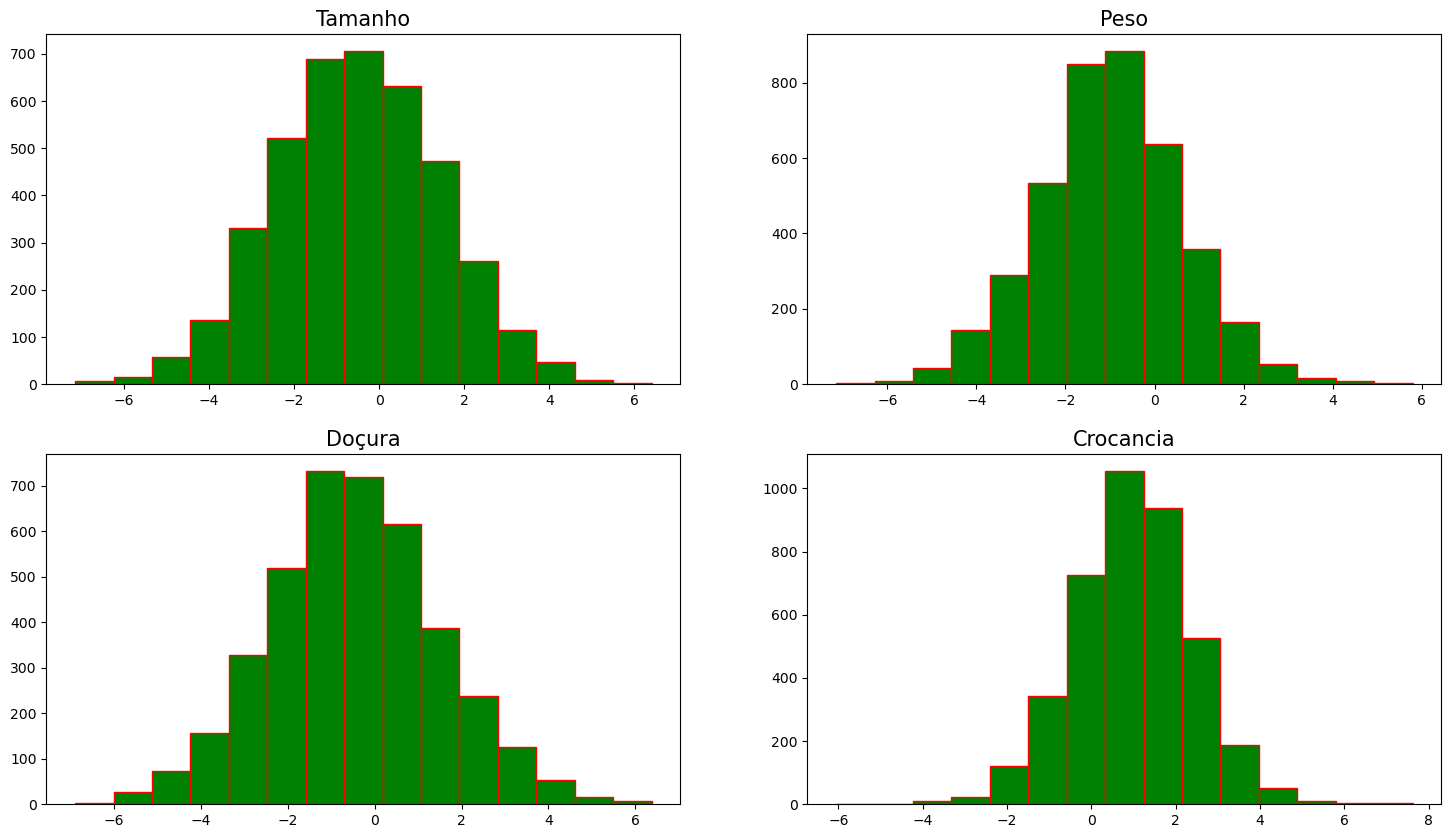

In [270]:
# Criando o histograma

fig, ax = plt.subplots(2, 2, figsize=(18,10))

ax[0][0].hist(df['Size'], bins=15, color='green', edgecolor='red')
ax[0][0].set_title('Tamanho', fontsize=15)

ax[0][1].hist(df['Weight'], bins=15, color='green', edgecolor='red')
ax[0][1].set_title('Peso', fontsize=15)

ax[1][0].hist(df['Sweetness'], bins=15, color='green', edgecolor='red')
ax[1][0].set_title('Doçura', fontsize=15)

ax[1][1].hist(df['Crunchiness'], bins=15, color='green', edgecolor='red')
ax[1][1].set_title('Crocancia', fontsize=15)

# Exibindo a figura
plt.show()

## Percebemos que todas as variáveis apresentam uma distribuição normal

# <font color="#FFA17A" style="font-size: 30px;">Exploração visual das relações entre variáveis.</font>
<hr style="border: 2px solid #FFA17A;">

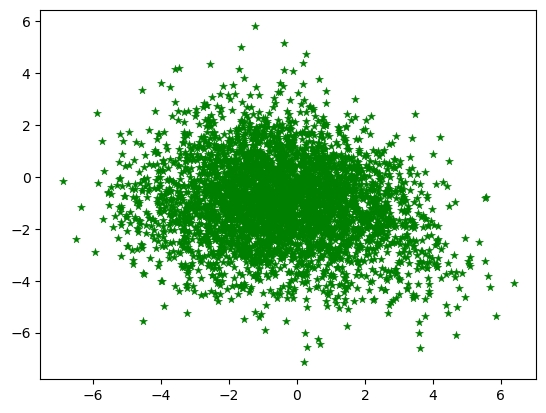

In [271]:
plt.scatter(x=df['Sweetness'], y = df['Weight'], c='green', marker='*',linewidths=0.3)

<Axes: xlabel='Sweetness', ylabel='Size'>

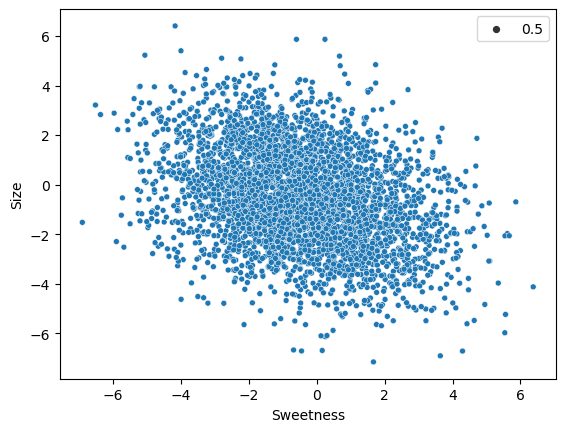

In [272]:
sns.scatterplot(x=df['Sweetness'], y = df['Size'], markers='*', size=0.5)

<Axes: xlabel='Crunchiness', ylabel='Weight'>

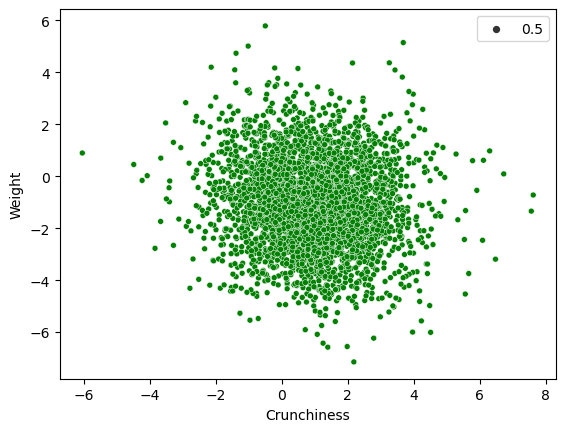

In [273]:
sns.scatterplot(x=df['Crunchiness'], y = df['Weight'], markers='*', size=0.5, color='green')

In [274]:
# gráficos de barras para visualizar a distribuição da qualidade das frutas.
df_qualidade = df.groupby('Quality').count()['A_id'].to_frame()
df_qualidade.columns = ['Quantidade']
df_qualidade = df_qualidade.reset_index()
df_qualidade

,Quality,Quantidade
0,bad,1996
1,good,2004


<Axes: title={'center': 'Gráfico de Barras'}, xlabel='Qualidade', ylabel='Quantidade'>

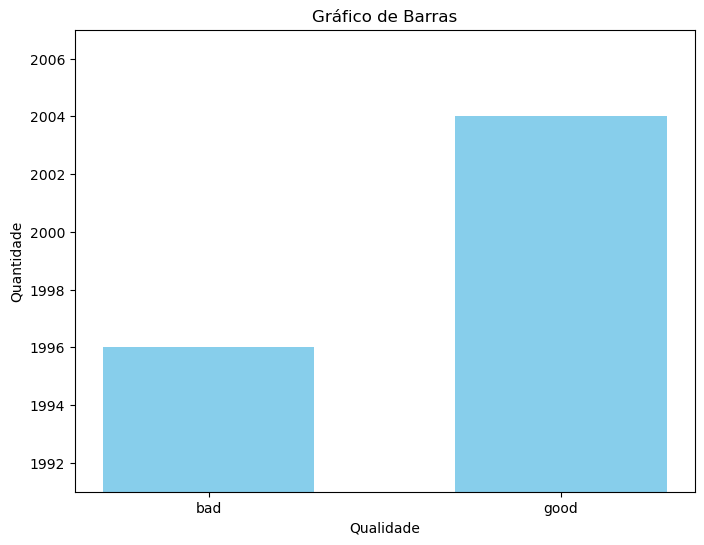

In [275]:
# Aumentando o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 6))

# Criando um gráfico de barras com Matplotlib
ax.bar(df_qualidade['Quality'],height = df_qualidade.Quantidade, color='skyblue', linewidth=1, width=0.6)

# Adicionando rótulos e título
ax.set_xlabel('Qualidade')
ax.set_ylabel('Quantidade')
ax.set_title('Gráfico de Barras')

# Definindo o intervalo do eixo y
ax.set_ylim([df_qualidade.query("Quality == 'bad'").Quantidade[0]-5,df_qualidade.query("Quality == 'good'").Quantidade[1]+3])

# Exibindo o gráfico

ax

## Por uma margem pequena de diferença, existem mais frutas de boa qualidade do que de má. Ou seja, ela então distribuidas praticamente de forma igualitária na amostra

In [276]:
df['Ripeness'].min()

-5.864598918

In [277]:
df['Ripeness'].max()

7.237836684

# <font color="#FFA17A" style="font-size: 30px;">Identificação de correlações entre variáveis.</font>
<hr style="border: 2px solid #FFA17A;">

In [278]:
#transformar as variáveis categóricas em numéricas
df_corr = df.copy()

for i in range(len(df)):
    
    if df_corr['Quality'][i] == 'good':
        df_corr.loc[i, 'Quality'] = 1
    else:
        df_corr.loc[i, 'Quality'] = 0

df_corr

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


---
### Esse aviso, conhecido como `SettingWithCopyWarning`, é emitido pelo pandas quando você está tentando modificar um DataFrame que é uma "visualização" de outro DataFrame, em vez de uma cópia explícita. Isso pode levar a comportamentos inesperados, pois o pandas não pode garantir se a modificação será feita no DataFrame original ou na cópia, dependendo da forma como você acessa os dados.


### Para evitar esse aviso e garantir que você está fazendo alterações na cópia, é recomendável usar o método `.loc` para atribuir valores. Por exemplo:

---

```python
df_corr.loc[i, 'Quality'] = 1
```
---

### Dessa forma, você está explicitamente informando ao pandas que deseja modificar a cópia (`df_corr`) e não o DataFrame original. Essa abordagem geralmente elimina o aviso `SettingWithCopyWarning`.

---

In [279]:
# Matriz de Correlação

df_matriz = df_corr.iloc[:,1:].corr()
df_matriz

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


## Correlação particamente inexistentes entre as variáveis

<Axes: >

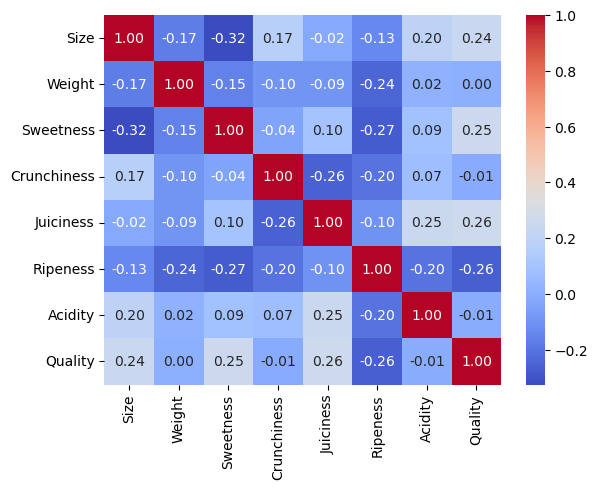

In [280]:
sns.heatmap(df_matriz, annot=True, cmap='coolwarm', fmt='.2f')  
# annot: é um booleano que controla se os valores devem ser exibidos dentro das células do mapa de calor.
# fmt  : controla o formato dos valores exibidos dentro das células quando annot é configurado como True.

In [281]:
display(df_matriz['Quality'].sort_values(ascending=False))

print("- Maiores correlações -\n\nNível de suculência da fruta: 0.260223\nGrau de doçura da fruta: 0.250998\nTamanho da fruta: 0.244007\nEstágio de maturidade da fruta: -0.264315")

Quality        1.000000
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64

- Maiores correlações -

Nível de suculência da fruta: 0.260223
Grau de doçura da fruta: 0.250998
Tamanho da fruta: 0.244007
Estágio de maturidade da fruta: -0.264315


### Mesmo assim são baixas correlações

# <font color="#FFA17A" style="font-size: 30px;">Analisar como a qualidade das frutas se relaciona com os diferentes níveis contínuos de "Ripeness".</font>
<hr style="border: 2px solid #FFA17A;">

In [282]:
# Discretização do Ripeness

# Ordenar os valores
maturidade_ordem = df['Ripeness'].sort_values(ascending=True)
maturidade_ordem_index = maturidade_ordem.reset_index(drop=True)

# Rótulos e pontos de corte
rotulos = ['Maturação Inicial', 'Maturação 2', 'Maturação 3', 'Muito Maduro']
bins = [-float('inf'), maturidade_ordem_index.loc[999], maturidade_ordem_index.loc[1999], maturidade_ordem_index.loc[2999], float('inf')]

teste = pd.cut(maturidade_ordem, bins=bins, labels=rotulos, right=False)

df['Rotulo_Ripeness'] = df.index.map(teste)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Rotulo_Ripeness
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,Maturação 2
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,Maturação 3
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,Maturação 2
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,Maturação Inicial
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,Maturação Inicial
...,...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad,Muito Maduro
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good,Maturação Inicial
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad,Muito Maduro
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good,Maturação 2


---
`-float('inf')` é utilizado como um valor artificialmente pequeno para garantir que o valor no índice 0 seja incluído no primeiro intervalo ao usar `right=False` no `pd.cut`. Similarmente, `float('inf')` é um valor artificialmente grande para garantir que o valor no índice 3999 seja incluído no último intervalo, independentemente das configurações. Essa abordagem cria pontos de corte que são menor que todos os valores reais e maior que todos os valores reais, respectivamente.

---

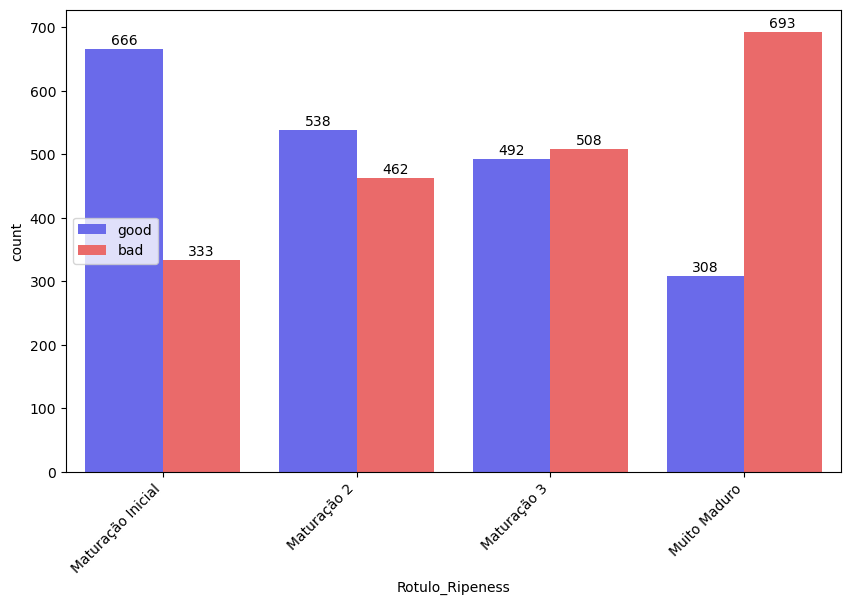

In [283]:
# Gráfico de Barras ou Boxplot com Ripeness Discretizado

df_para_analise = df[['Quality', 'Rotulo_Ripeness']]
df_grafico = df_para_analise.groupby('Rotulo_Ripeness').value_counts().to_frame().reset_index()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_grafico, x='Rotulo_Ripeness', y='count', hue='Quality', palette='seismic')
plt.xticks(rotation=45, ha='right')

plt.legend(loc='center left')

# Adicionar os valores nas barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

In [284]:
df_grafico = df_para_analise.groupby('Rotulo_Ripeness').value_counts().to_frame().reset_index()
df_grafico

,Rotulo_Ripeness,Quality,count
0,Maturação Inicial,good,666
1,Maturação Inicial,bad,333
2,Maturação 2,good,538
3,Maturação 2,bad,462
4,Maturação 3,bad,508
5,Maturação 3,good,492
6,Muito Maduro,bad,693
7,Muito Maduro,good,308


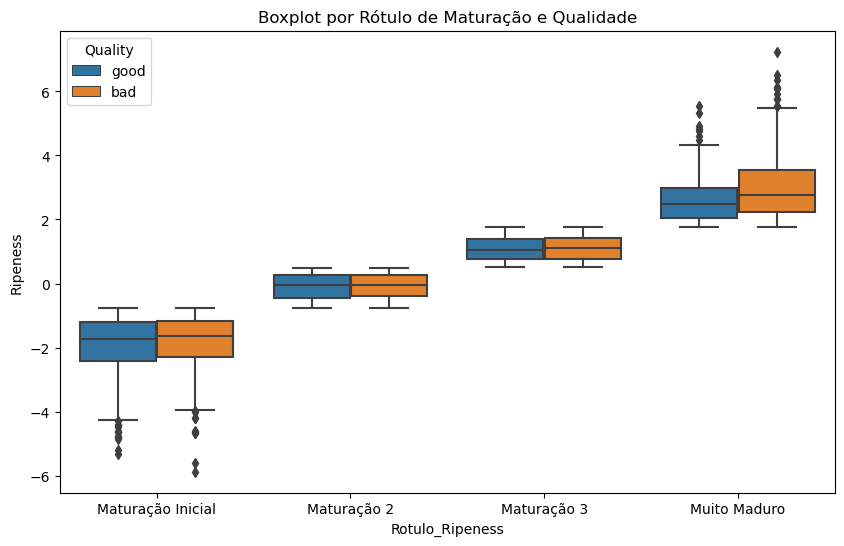

In [285]:
# Criar um boxplot usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rotulo_Ripeness', y='Ripeness', hue='Quality', data=df)
plt.title('Boxplot por Rótulo de Maturação e Qualidade')
plt.show()


In [286]:
for i in df.columns[0:-1]:  
    print(f"-----{i}------")
    display(df.groupby('Rotulo_Ripeness')[i].describe())

-----A_id------


,count,mean,std,min,25%,50%,75%,max
Rotulo_Ripeness,,,,,,,,
Maturação Inicial,999.0,2010.897898,1153.839071,3.0,1021.00,1966.0,3055.50,3999.0
Maturação 2,1000.0,2004.301000,1158.359594,0.0,998.50,2035.0,3009.25,3998.0
Maturação 3,1000.0,1994.237000,1148.007221,1.0,1010.75,1991.5,2983.00,3990.0
Muito Maduro,1001.0,1988.586414,1160.729735,5.0,959.00,2018.0,2956.00,3997.0


-----Size------


,count,mean,std,min,25%,50%,75%,max
Rotulo_Ripeness,,,,,,,,
Maturação Inicial,999.0,-0.181012,1.861777,-6.905803,-1.221044,0.003216,1.031981,5.225383
Maturação 2,1000.0,-0.351653,1.903697,-6.713315,-1.706434,-0.341076,1.138967,4.834608
Maturação 3,1000.0,-0.646840,1.888073,-5.692093,-1.931759,-0.861185,0.559270,5.866232
Muito Maduro,1001.0,-0.831903,1.992360,-7.151703,-2.283839,-0.906692,0.484333,6.406367


-----Weight------


,count,mean,std,min,25%,50%,75%,max
Rotulo_Ripeness,,,,,,,,
Maturação Inicial,999.0,-0.515309,1.771460,-7.149848,-1.653765,-0.481595,0.663931,5.790714
Maturação 2,1000.0,-0.858761,1.481926,-5.908736,-1.801375,-0.803569,0.067207,4.363066
Maturação 3,1000.0,-1.056765,1.435638,-5.746384,-1.968827,-1.044143,-0.164220,4.202643
Muito Maduro,1001.0,-1.526340,1.533009,-6.581590,-2.516415,-1.490509,-0.594134,3.460396


-----Sweetness------


,count,mean,std,min,25%,50%,75%,max
Rotulo_Ripeness,,,,,,,,
Maturação Inicial,999.0,0.085132,1.490088,-5.216879,-0.934217,-0.054683,1.028125,5.559624
Maturação 2,1000.0,-0.313696,1.823549,-5.150419,-1.607268,-0.513469,0.732920,6.374916
Maturação 3,1000.0,-0.375327,2.001044,-5.746674,-1.721044,-0.428001,0.971902,5.862356
Muito Maduro,1001.0,-1.276661,2.138541,-6.894485,-2.759251,-1.394239,0.106935,5.019020


-----Crunchiness------


,count,mean,std,min,25%,50%,75%,max
Rotulo_Ripeness,,,,,,,,
Maturação Inicial,999.0,1.379466,1.597537,-3.504206,0.365818,1.344037,2.479275,7.619852
Maturação 2,1000.0,0.984177,1.328920,-6.055058,0.152709,1.119452,1.897897,5.531817
Maturação 3,1000.0,0.893765,1.306898,-4.495359,0.103847,0.957275,1.753907,4.696968
Muito Maduro,1001.0,0.685198,1.263979,-3.292343,-0.195316,0.682927,1.487951,5.559759


-----Juiciness------


,count,mean,std,min,25%,50%,75%,max
Rotulo_Ripeness,,,,,,,,
Maturação Inicial,999.0,0.822289,2.189651,-5.814308,-0.703836,0.992272,2.446632,7.364403
Maturação 2,1000.0,0.607019,1.996681,-5.961897,-0.806985,0.812377,2.080996,6.446302
Maturação 3,1000.0,0.364050,1.741776,-5.498667,-0.785394,0.484322,1.532625,6.226448
Muito Maduro,1001.0,0.255680,1.705560,-5.452212,-0.884048,0.189144,1.367183,5.915579


-----Ripeness------


,count,mean,std,min,25%,50%,75%,max
Rotulo_Ripeness,,,,,,,,
Maturação Inicial,999.0,-1.900639,0.907297,-5.864599,-2.366730,-1.697415,-1.191673,-0.775497
Maturação 2,1000.0,-0.087775,0.379512,-0.773796,-0.425691,-0.044438,0.255729,0.501795
Maturação 3,1000.0,1.097560,0.359058,0.502737,0.768092,1.072856,1.413962,1.760901
Muito Maduro,1001.0,2.879184,0.911120,1.765281,2.179049,2.681430,3.359630,7.237837


-----Acidity------


,count,mean,std,min,25%,50%,75%,max
Rotulo_Ripeness,,,,,,,,
Maturação Inicial,999.0,0.812519,2.187336,-7.010538,-0.581891,0.939596,2.381325,7.404736
Maturação 2,1000.0,-0.009686,2.116424,-5.917900,-1.478322,-0.066626,1.501613,6.184145
Maturação 3,1000.0,-0.256961,1.950378,-5.387118,-1.562041,-0.368196,0.942831,6.701395
Muito Maduro,1001.0,-0.237313,2.000074,-6.955460,-1.576528,-0.221105,1.054951,6.138965


-----Quality------


,count,unique,top,freq
Rotulo_Ripeness,,,,
Maturação Inicial,999,2,good,666
Maturação 2,1000,2,good,538
Maturação 3,1000,2,bad,508
Muito Maduro,1001,2,bad,693


---

## Relação Maturação x  Qualidade

> Percebe-se que quanto maior a maturação maior a probabilidade da fruta ter baixa qualidade (bad). Os extremos, maturação inicial e muito madura são inclusive muito parecidos só que com espectro oposto demonstrando melhor a relação entre essas variáveis.
---
> no boxplot podemos perceber os valores médios em que se encontram cada categoria de amadurecimento

---

## **Revisão Geral dos Resultados e Conclusões:**

### 1. **Familiarização com os Dados:**
   - Dados ausentes foram identificados e removidos.
   - Conversão da coluna 'Acidity' para o tipo float.
   - Exploração estatística básica das variáveis foi realizada.

### 2. **Exploração Visual das Relações entre Variáveis:**
   - Histogramas foram criados para visualizar as distribuições de tamanho, peso, doçura e crocância.
   - Relações entre doçura e peso, doçura e tamanho, e crocância e peso foram visualizadas em gráficos de dispersão.

### 3. **Distribuição da Qualidade das Frutas:**
   - Gráfico de barras foi utilizado para mostrar a distribuição de frutas por qualidade.
   - Notou-se uma distribuição quase igualitária entre as categorias de boa e má qualidade.

### 4. **Identificação de Correlações entre Variáveis:**
   - A matriz de correlação revelou correlações relativamente baixas entre as variáveis.
   - Destacou-se que a suculência, doçura, tamanho e estágio de maturidade tinham as maiores correlações com a qualidade, mas ainda eram moderadas.

### 5. **Análise da Relação entre Maturação e Qualidade:**
   - Discretização da variável 'Ripeness' em rótulos específicos.
   - Gráficos de barras e boxplot foram utilizados para analisar a relação entre a maturação e a qualidade.
   - Conclusão: Notou-se que, em geral, quanto maior a maturação, maior a probabilidade de a fruta ter baixa qualidade.


### **Breve Resumo do Aprendizado:**
   - Aprendizado na manipulação e exploração de conjuntos de dados.
   - Aplicação de técnicas estatísticas básicas.
   - Criação e interpretação de visualizações para análise exploratória.
   - Importância da escolha e manipulação adequada das variáveis para análises significativas.

<h1 style='color: #00A78C; font-size: 34px; font-weight: bold;'>Análise de Qualidade de Frutas - Parte 2 

</h1>

---

# <font color="#FFA17A" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #FFA17A;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b>Construir um modelo para prever a classificação de qualidade de frutas usando vários atributos.</b></i>     
</p>

---

Aqui está a tradução dos nomes das colunas para o português:

1. 'A_id': Identificador_A
2. 'Size': Tamanho
3. 'Weight': Peso
4. 'Sweetness': Doçura
5. 'Crunchiness': Crocância
6. 'Juiciness': Suculência
7. 'Ripeness': Maturação
8. 'Acidity': Acidez
9. 'Quality': Qualidade
10. 'Rotulo_Ripeness': Rótulo_Maturação

In [287]:
lista_ = [1 if i=='good' else 0 for i in df.Quality ]
print(lista_[:11])

[1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]


In [288]:
df['Numerico_Quality'] = lista_
df[['A_id', 'Size','Weight' ,'Sweetness','Crunchiness','Juiciness','Ripeness','Acidity','Numerico_Quality']].corr()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Numerico_Quality
A_id,1.000000,-0.028911,-0.005730,-0.002378,-0.013111,0.006179,0.000742,-0.022237,0.004875
Size,-0.028911,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.005730,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.002378,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,-0.013111,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,0.006179,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,0.000742,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,-0.022237,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Numerico_Quality,0.004875,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


---
## Aqui vou tomar uma decisão que é categorizar as varíaveis com menor correlação. Porém, os criterios para divisão das partes (bins) das variáveis serão feitas de forma subjetiva, não seguindo uma lógica necessariamente.

## Faço isso pois o maior objetivo aqui é aprendizado e aplicação de conceitos

---

In [289]:
# Vou remover coluna de id e discretizar algumas variáveis
df.drop(['A_id','Numerico_Quality'], axis=1, inplace=True)

# Vou manter as variáveis Size, Sweetness, Juiciness, Ripeness


In [290]:
# Discretização das variáveis Weight, Crunchiness, Acidity

def discretizar (x):
    # Ordenar os valores
    coluna_ordem = x.sort_values(ascending=True)
    coluna_ordem_index = coluna_ordem.reset_index(drop=True)

    # Rótulos e pontos de corte
    rotulos = [f'{x.name} Inicial', f'{x.name} 2', f'{x.name} 3', f'Muito {x.name}']
    bins = [-float('inf'), coluna_ordem_index.loc[999], coluna_ordem_index.loc[1999], coluna_ordem_index.loc[2999], float('inf')]

    teste = pd.cut(coluna_ordem, bins=bins, labels=rotulos, right=False)

    df[f'Rotulo_{x.name}'] = df.index.map(teste)
    df.drop(x.name, axis=1, inplace=True)

In [291]:
# Discretização das variáveis Weight, Crunchiness, Acidity
discretizar (df['Weight'])
discretizar (df['Crunchiness'])
discretizar (df['Acidity'])

In [292]:
df

,Size,Sweetness,Juiciness,Ripeness,Quality,Rotulo_Ripeness,Rotulo_Weight,Rotulo_Crunchiness,Rotulo_Acidity
0,-3.970049,5.346330,1.844900,0.329840,good,Maturação 2,Weight Inicial,Crunchiness Inicial,Acidity 2
1,-1.195217,3.664059,0.853286,0.867530,good,Maturação 3,Weight Inicial,Crunchiness 3,Acidity 2
2,-0.292024,-1.738429,2.838636,-0.038033,bad,Maturação 2,Weight 2,Crunchiness Inicial,Muito Acidity
3,-0.657196,1.324874,3.637970,-3.413761,good,Maturação Inicial,Weight Inicial,Crunchiness Inicial,Acidity 3
4,1.364217,-0.384658,3.030874,-1.303849,good,Maturação Inicial,Weight 2,Crunchiness Inicial,Acidity 3
...,...,...,...,...,...,...,...,...,...
3995,0.059386,-3.714549,1.697986,2.244055,bad,Muito Maduro,Weight 2,Crunchiness 2,Acidity 3
3996,-0.293118,-0.204020,0.024523,-1.087900,good,Maturação Inicial,Muito Weight,Crunchiness Inicial,Muito Acidity
3997,-2.634515,-2.440461,2.199709,4.763859,bad,Muito Maduro,Weight Inicial,Crunchiness 2,Acidity 2
3998,-4.008004,2.366397,2.161435,0.214488,good,Maturação 2,Weight 2,Crunchiness Inicial,Acidity Inicial


# <font color="#FFA17A" style="font-size: 30px;">Criação da Matriz de Características</font>
<hr style="border: 2px solid #FFA17A;">

---
## <font color=#c5106e style="font-size: 30px;">codificação one-hot para variáveis categóricas</font>

---

In [293]:
df.drop('Rotulo_Ripeness', axis=1, inplace=True)
df.head(3)

,Size,Sweetness,Juiciness,Ripeness,Quality,Rotulo_Weight,Rotulo_Crunchiness,Rotulo_Acidity
0,-3.970049,5.346330,1.844900,0.329840,good,Weight Inicial,Crunchiness Inicial,Acidity 2
1,-1.195217,3.664059,0.853286,0.867530,good,Weight Inicial,Crunchiness 3,Acidity 2
2,-0.292024,-1.738429,2.838636,-0.038033,bad,Weight 2,Crunchiness Inicial,Muito Acidity


In [294]:
colunas_codi_one_hot = ['Rotulo_Weight', 'Rotulo_Crunchiness', 'Rotulo_Acidity']

for cols in colunas_codi_one_hot:
    
    # Realizar a codificação one-hot para a coluna
    coluna_one_hot = pd.get_dummies(df[cols], dtype='int')

    # Concatenar as colunas codificadas no DataFrame original
    df = pd.concat([df, coluna_one_hot], axis=1)

    # Remover a coluna original
    df = df.drop(cols, axis=1)

# Substituir os espaços em branco por 0
df.replace("", 0, inplace=True)

df.head()

,Size,Sweetness,Juiciness,Ripeness,Quality,Weight Inicial,Weight 2,Weight 3,Muito Weight,Crunchiness Inicial,Crunchiness 2,Crunchiness 3,Muito Crunchiness,Acidity Inicial,Acidity 2,Acidity 3,Muito Acidity
0,-3.970049,5.346330,1.844900,0.329840,good,1,0,0,0,1,0,0,0,0,1,0,0
1,-1.195217,3.664059,0.853286,0.867530,good,1,0,0,0,0,0,1,0,0,1,0,0
2,-0.292024,-1.738429,2.838636,-0.038033,bad,0,1,0,0,1,0,0,0,0,0,0,1
3,-0.657196,1.324874,3.637970,-3.413761,good,1,0,0,0,1,0,0,0,0,0,1,0
4,1.364217,-0.384658,3.030874,-1.303849,good,0,1,0,0,1,0,0,0,0,0,1,0


In [295]:
# Mapear a variável quality para valores númericos binários

# Codificar a coluna 'Quality'
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
df

,Size,Sweetness,Juiciness,Ripeness,Quality,Weight Inicial,Weight 2,Weight 3,Muito Weight,Crunchiness Inicial,Crunchiness 2,Crunchiness 3,Muito Crunchiness,Acidity Inicial,Acidity 2,Acidity 3,Muito Acidity
0,-3.970049,5.346330,1.844900,0.329840,1,1,0,0,0,1,0,0,0,0,1,0,0
1,-1.195217,3.664059,0.853286,0.867530,1,1,0,0,0,0,0,1,0,0,1,0,0
2,-0.292024,-1.738429,2.838636,-0.038033,0,0,1,0,0,1,0,0,0,0,0,0,1
3,-0.657196,1.324874,3.637970,-3.413761,1,1,0,0,0,1,0,0,0,0,0,1,0
4,1.364217,-0.384658,3.030874,-1.303849,1,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.059386,-3.714549,1.697986,2.244055,0,0,1,0,0,0,1,0,0,0,0,1,0
3996,-0.293118,-0.204020,0.024523,-1.087900,1,0,0,0,1,1,0,0,0,0,0,0,1
3997,-2.634515,-2.440461,2.199709,4.763859,0,1,0,0,0,0,1,0,0,0,1,0,0
3998,-4.008004,2.366397,2.161435,0.214488,1,0,1,0,0,1,0,0,0,1,0,0,0


---
## <font color=#c5106e style="font-size: 30px;"> Escalonamento Min-Max para variáveis numéricas</font>

---

In [298]:
colunas_escala_min_max = ['Size', 'Sweetness', 'Juiciness', 'Ripeness']

# Criando o objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustando e transformando os dados
dados_escalonados = scaler.fit_transform(df[colunas_escala_min_max])
df[colunas_escala_min_max] = dados_escalonados  
df

,Size,Sweetness,Juiciness,Ripeness,Quality,Weight Inicial,Weight 2,Weight 3,Muito Weight,Crunchiness Inicial,Crunchiness 2,Crunchiness 3,Muito Crunchiness,Acidity Inicial,Acidity 2,Acidity 3,Muito Acidity
0,0.234669,0.922484,0.585819,0.472770,1,1,0,0,0,1,0,0,0,0,1,0,0
1,0.439331,0.795706,0.511408,0.513807,1,1,0,0,0,0,0,1,0,0,1,0,0
2,0.505948,0.388567,0.660388,0.444693,0,0,1,0,0,1,0,0,0,0,0,0,1
3,0.479014,0.619422,0.720370,0.187052,1,1,0,0,0,1,0,0,0,0,0,1,0
4,0.628107,0.490589,0.674814,0.348084,1,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.531867,0.239644,0.574794,0.618866,0,0,1,0,0,0,1,0,0,0,0,1,0
3996,0.505867,0.504203,0.449218,0.364566,1,0,0,0,1,1,0,0,0,0,0,0,1
3997,0.333173,0.335661,0.612443,0.811182,0,1,0,0,0,0,1,0,0,0,1,0,0
3998,0.231869,0.697913,0.609571,0.463966,1,0,1,0,0,1,0,0,0,1,0,0,0


---
## <font color=#c5106e style="font-size: 30px;"> Criando o Modelo de Machine Learning</font>

---

---

## Dividindo os dados em Conjunto de treinamento e teste

---

In [309]:
#Separar variáveis independentes(features) e variável dependente (rótulo)
X = df.drop('Quality', axis=1)
y = df['Quality']

#Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

---

## Modelo de Regressão Logística

---

In [311]:
# criar e treinar o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predicao = modelo.predict(X_test)

---

## Avaliar o desempenho do modelo

---

In [313]:
acuracia = accuracy_score(y_test, predicao)
relatorio = classification_report(y_test, predicao)

print(f'Acurácia: {acuracia}')
print('Relatório de Classificação:')
print(relatorio)

Acurácia: 0.7575
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       401
           1       0.76      0.74      0.75       399

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



---

## Previsões com o modelo utilizado

---

In [315]:
def fazer_previsao(modelo, valores):
    # Garantir que os valores estejam em um DataFrame
    dados = pd.DataFrame([valores], columns=X.columns)
    
    # Fazer a previsão
    previsao = modelo.predict(dados)
    
    # Retornar a previsão (1 para 'good' e 0 para 'bad')
    return previsao[0]

In [325]:
# Exemplo de valores para as variáveis independentes
valores_exemplo = {'Size': 0.5, 'Sweetness': 0.6, 'Juiciness': 0.7, 'Ripeness': 0.8,
                   'Weight Inicial': 1, 'Weight 2': 0, 'Weight 3': 0, 'Muito Weight': 0,
                   'Crunchiness Inicial': 1, 'Crunchiness 2': 0, 'Crunchiness 3': 0, 'Muito Crunchiness': 0,
                   'Acidity Inicial': 0, 'Acidity 2': 1, 'Acidity 3': 0, 'Muito Acidity': 0}

# Fazer a previsão usando a função
resultado = fazer_previsao(modelo, valores_exemplo)

# Exibir o resultado
mensagem = "A fruta tem BOA qualidade" if resultado == 1 else "A fruta tem MÁ qualidade"
linha = "-" * len(mensagem)

print(linha)
print(mensagem)
print(linha)


-------------------------
A fruta tem BOA qualidade
-------------------------
